In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [2]:
# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['target'] = data.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
#Train and test the data of breast cancer dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
#  Compute the score of the model
train_score = nb_classifier.score(X_train, y_train)
test_score = nb_classifier.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)


Training Score: 0.9422110552763819
Testing Score: 0.9239766081871345


In [13]:
# Use the predict_proba method to find the probability
# Predict probabilities for the first few test data points
probabilities = nb_classifier.predict_proba(X_test[:5])
print("Probabilities for the first few test data points:")
print(probabilities)

for i in range(5):
    print(f"Probability of class Malignant for data point {i+1}: {probabilities[i][0]}")
    print(f"Probability of class Benign for data point {i+1}: {probabilities[i][1]}")

Probabilities for the first few test data points:
[[9.99999623e-01 3.77053186e-07]
 [4.48249009e-13 1.00000000e+00]
 [3.80802767e-14 1.00000000e+00]
 [1.92053261e-11 1.00000000e+00]
 [2.78578114e-16 1.00000000e+00]]
Probability of class Malignant for data point 1: 0.9999996229468135
Probability of class Benign for data point 1: 3.7705318649843974e-07
Probability of class Malignant for data point 2: 4.4824900877405946e-13
Probability of class Benign for data point 2: 0.9999999999995524
Probability of class Malignant for data point 3: 3.8080276681690467e-14
Probability of class Benign for data point 3: 0.9999999999999627
Probability of class Malignant for data point 4: 1.920532608164554e-11
Probability of class Benign for data point 4: 0.9999999999807949
Probability of class Malignant for data point 5: 2.7857811366677806e-16
Probability of class Benign for data point 5: 1.0


In [12]:
for i in range(5):
    print(f"Probability of class Malignant for data point {i+1}: {probabilities[i][0]:.4f}")
    print(f"Probability of class Benign for data point {i+1}: {probabilities[i][1]:.4f}")

Probability of class Malignant for data point 1: 1.0000
Probability of class Benign for data point 1: 0.0000
Probability of class Malignant for data point 2: 0.0000
Probability of class Benign for data point 2: 1.0000
Probability of class Malignant for data point 3: 0.0000
Probability of class Benign for data point 3: 1.0000
Probability of class Malignant for data point 4: 0.0000
Probability of class Benign for data point 4: 1.0000
Probability of class Malignant for data point 5: 0.0000
Probability of class Benign for data point 5: 1.0000


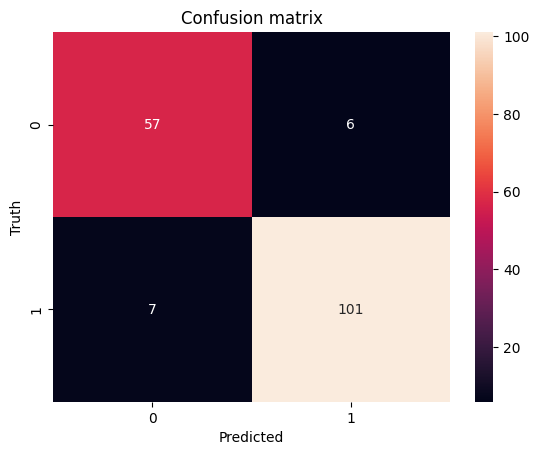

In [15]:
Y_prediction = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, Y_prediction)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Naive Bayes
Naive Bayes is a probabilistic machine learning algorithm that can be used in a wide variety of classification tasks.

Typical applications include filtering spam, classifying documents, sentiment prediction etc. It is based on the works of Rev. Thomas Bayes (1702) and hence the name.


# Optimizing Your Data for Naive Bayes

## 1. Categorical Inputs
- Naive Bayes works best with label attributes that are **binary**, **categorical**, or **nominal** in nature.

## 2. Gaussian Inputs
- For real-valued input variables, Naive Bayes assumes a **Gaussian distribution**.
- The algorithm performs better if the data’s univariate distributions are Gaussian or close to Gaussian.
- This may involve **removing outliers** (e.g., values more than 3 or 4 standard deviations from the mean).

## 3. Classification Problems
- Naive Bayes is well-suited for both **binary** and **multiclass** classification tasks.

## 4. Log Probabilities
- Likelihood calculations in Naive Bayes involve multiplying many small numbers, which can lead to **numerical precision issues** due to underflow.
- Using a **log transform** of the probabilities is a good practice to prevent underflow.

## 5. Kernel Functions
- Instead of assuming a Gaussian distribution for numerical inputs, more complex distributions, such as various **kernel density functions**, can be employed.

## 6. Update Probabilities
- When new data is available, you can **update the model's probabilities**.
- This is particularly useful in scenarios where the data is frequently changing.


**Exercice 2**

In [16]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [19]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


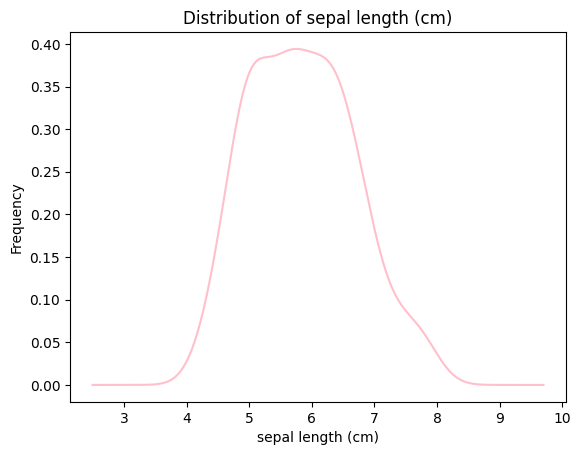

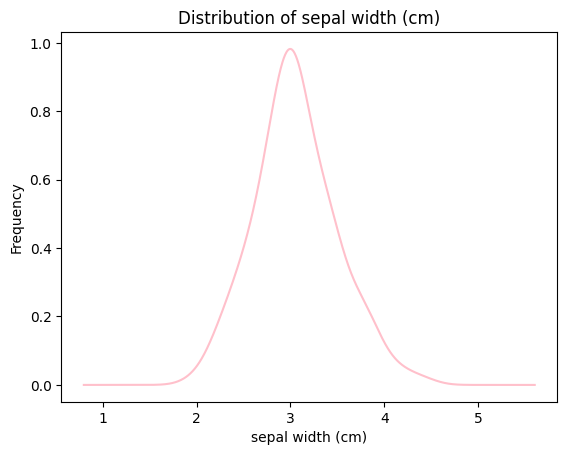

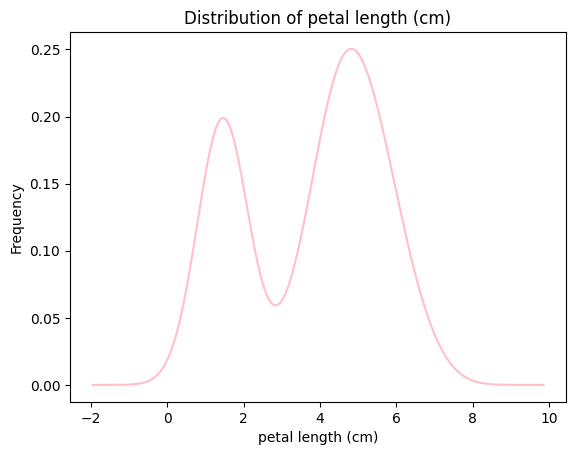

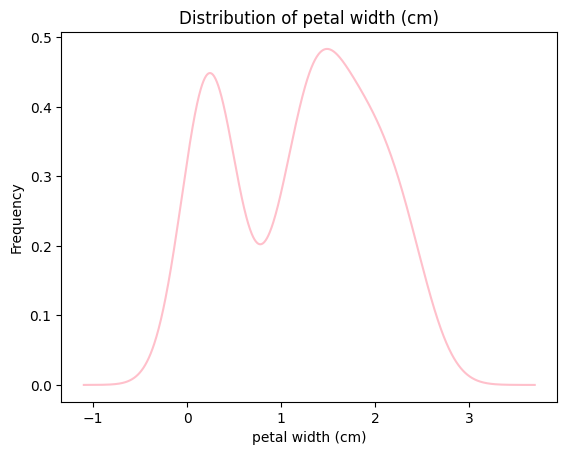

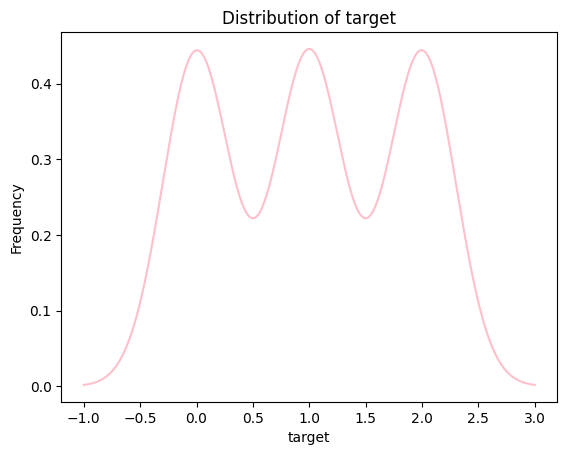

In [33]:
# Loop through each column in the DataFrame and plot its distribution
for col in data.columns:
    plt.figure()
    data[col].plot(kind="density",color='pink')  # Plot the histogram for the column with 20 bins
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Here the BernoulliNB cannot be used only by binarizing the features, otherwise it wont preform that great as much as GaussianNB due to the type of data in iris.

Since the features of Dataset iris are continous, GaussianNB assumes the data for the features are normally distributed.

MultinomialNB is often more effective because it captures more detailed information than the BernouliNB.

In [20]:
nb_classifier = BernoulliNB()

In [21]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to see how well GaussianNB works
cross_val_scores_gaussian = cross_val_score(nb_classifier, X, y, cv=5)
print("Cross-validation scores for BernoulliNB:", cross_val_scores_gaussian.mean())


Cross-validation scores for BernoulliNB: 0.3333333333333333


In [22]:
nb_classifier = MultinomialNB()

In [23]:
cross_val_scores_gaussian = cross_val_score(nb_classifier, X, y, cv=5)
print("Cross-Validation scores for MultiNomial:", cross_val_scores_gaussian.mean())

Cross-Validation scores for MultiNomial: 0.9533333333333334


In [24]:
sample_data = [[5.85, 4.5, 1, 2.5]]

In [25]:
nb_classifier.fit(X_train,y_train)

MultinomialNB()

In [26]:
pred_class_multinomial = nb_classifier.predict(sample_data)
print("Class predicted by multinomialNB",iris.target_names[pred_class_multinomial[0]])

Class predicted by multinomialNB versicolor


In [27]:
Br_classifier = BernoulliNB()

In [28]:
Br_classifier.fit(X_train, y_train)
pred_class_bernoulli = Br_classifier.predict(sample_data)


In [29]:
print(pred_class_bernoulli)

[2]


In [30]:
print(iris.target_names[pred_class_bernoulli[0]])


virginica


# Types of Naive Bayes Classifiers
**1. Gaussian Naive Bayes:**

- Used when the attributes are continuous and follow a normal distribution.
- Assumes that the data for each class is normally distributed.

**2. Multinomial Naive Bayes:**

- Typically used for document classification where the data is word frequency counts.
- Assumes that the features follow a multinomial distribution, suitable for text classification tasks.

**3. Bernoulli Naive Bayes:**

- Suited for binary variables (e.g., presence or absence of a feature).
- Often used in text classification where features are binary indicators representing the presence or absence of a particular word.